In [1]:
# Import all the necessary packages.
import pandas as pd
import numpy as np

# Read the provided CSV file/data set.
df = pd.read_csv('customer_data.csv') 

# Print the output.
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            41188 non-null  int64  
 1   Occupation     41188 non-null  object 
 2   Status         41188 non-null  object 
 3   Edu            41188 non-null  object 
 4   House          41188 non-null  object 
 5   Loan           41188 non-null  object 
 6   Comm           41188 non-null  object 
 7   Month          41188 non-null  object 
 8   DOW            41188 non-null  object 
 9   Duration       41188 non-null  int64  
 10  Campaign       41188 non-null  int64  
 11  PosDays        41188 non-null  int64  
 12  Last_out       41188 non-null  object 
 13  Var_rate       41188 non-null  float64
 14  Price_idx      41188 non-null  float64
 15  Conf_idx       41188 non-null  float64
 16  Month_rate     41188 non-null  float64
 17  Quarterly_emp  41188 non-null  float64
 18  Target

,Age,Occupation,Status,Edu,House,Loan,Comm,Month,DOW,Duration,Campaign,PosDays,Last_out,Var_rate,Price_idx,Conf_idx,Month_rate,Quarterly_emp,Target
0,44,blue-collar,married,basic.4y,yes,no,cellular,aug,thu,210,1,999,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,cellular,nov,fri,138,1,999,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,yes,no,cellular,jun,thu,339,3,6,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,cellular,apr,fri,185,2,999,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,yes,no,cellular,aug,fri,137,1,3,success,-2.9,92.201,-31.4,0.869,5076.2,1


The first logistic regression assumption to be met is that the output would be binary. The last column of the data set is named Target and consists of binary data (1, 0). We’ve already indicated whether clients have churned as yes (1) and no (0), so the desired outcome should be , as indicated in the Target column. Therefore, Assumption 1 and Assumption 2 have been met, which, recall, were:

Assumption 1: Binary logistic regression requires the dependent variable to be binary.
Assumption 2: For a binary logistic regression, the factor level 1 of the dependent variable should represent the desired outcome.
We’ve established that the data set is large based on the business question. Therefore, Assumption 6 – Logistic regression requires large sample sizes relative to the data collected and the business question – has also been met!

# Assumption 3: Meaningful variables

In [2]:
# Specify the DataFrame column & add/determine the values.
df['Edu'].value_counts() 

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: Edu, dtype: int64

In [3]:
# Create two lists: one with initial and one with new values.
intial_vals = ['illiterate', 'unknown', 'basic',
               'high', 'university', 'professional']

new_vals = ['other', 'other', 'pre-school',
            'high-school', 'uni', 'masters']

# Create a for loop to replace the values.
for old_val, new_val in zip(intial_vals, new_vals):
    df.loc[df['Edu'].str.contains(old_val),'Edu' ] = new_val

# Display all the unique values/check changes.
df['Edu'].unique() 

array(['pre-school', 'other', 'uni', 'high-school', 'masters'],
      dtype=object)

An array was created with the changed variables. The output shows all the unique names in the Edu column. As we can see, illiterate and unknown have now been replaced by other.

In [4]:
df['Edu'].value_counts() 

pre-school     12513
uni            12168
high-school     9515
masters         5243
other           1749
Name: Edu, dtype: int64

In [5]:
# To convert strings to numbers, follow these prompts:
# Import the necessary modules, classes, and packages.
from sklearn.preprocessing import LabelEncoder
from sklearn.utils.validation import column_or_1d

# Create a class and write a user-defined function.
class MyLabelEncoder(LabelEncoder):
    
    def fit(self, y):
        y = column_or_1d(y, warn=True)
        self.classes_ = pd.Series(y).unique()
        return self

# View the output.
df.select_dtypes(include='object')

,Occupation,Status,Edu,House,Loan,Comm,Month,DOW,Last_out
0,blue-collar,married,pre-school,yes,no,cellular,aug,thu,nonexistent
1,technician,married,other,no,no,cellular,nov,fri,nonexistent
2,management,single,uni,yes,no,cellular,jun,thu,success
3,services,married,high-school,no,no,cellular,apr,fri,nonexistent
4,retired,married,pre-school,yes,no,cellular,aug,fri,success
...,...,...,...,...,...,...,...,...,...
41183,retired,married,high-school,no,yes,telephone,jun,thu,nonexistent
41184,housemaid,married,pre-school,no,no,telephone,may,thu,nonexistent
41185,admin.,single,uni,yes,yes,telephone,may,wed,nonexistent
41186,technician,married,masters,no,yes,telephone,oct,tue,nonexistent


In [6]:
# Order lists of the values for each column containing strings.
Edu_order = ['other', 'pre-school', 'high-school', 'uni', 'masters']
House_order = ['no', 'unknown', 'yes']
Loan_order = ['no', 'unknown', 'yes']
Month_order = ['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct',
               'nov', 'dec']
DOW_order = ['mon', 'tue', 'wed', 'thu', 'fri']
Last_out_order = ['nonexistent', 'failure', 'success']

# List of values to transform into numbers even though the values are not ordered.
Occupation_list = ['unemployed', 'unknown', 'student', 'blue-collar',
                   'technician', 'housemaid', 'admin.','retired',
                   'self-employed', 'entrepreneur', 'management', 'services']
Status_list = ['unknown', 'single', 'divorced', 'married']
Comm_list = ['cellular', 'telephone']

# Create a list containing all of the list of values.
Encoding_list = [Occupation_list, Status_list, Edu_order, House_order,
                 Loan_order, Comm_list, Month_order, DOW_order, Last_out_order]

In [7]:
# Pick non-numerical columns.
object_cols = df.select_dtypes(include= 'object').columns

# Transform string values to number with our LabelEncoder function.
for idx in range(len(object_cols)): 
    
    le = MyLabelEncoder()
    le.fit(Encoding_list[idx])
    df[object_cols[idx]] = le.transform(df[object_cols[idx]])
    
# View the DataFrame.
df.head()

,Age,Occupation,Status,Edu,House,Loan,Comm,Month,DOW,Duration,Campaign,PosDays,Last_out,Var_rate,Price_idx,Conf_idx,Month_rate,Quarterly_emp,Target
0,44,3,3,1,2,0,0,5,3,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0
1,53,4,3,0,0,0,0,8,4,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,10,1,3,2,0,0,3,3,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,11,3,2,0,0,0,1,4,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,7,3,1,2,0,0,5,4,137,1,3,2,-2.9,92.201,-31.4,0.869,5076.2,1


In [8]:
# Determine whether values in a column are balanced.
df['Target'].value_counts()  

0    36548
1     4640
Name: Target, dtype: int64

Text(0.5, 1.0, 'Target Imbalance')

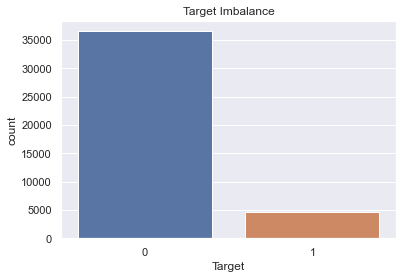

In [9]:
# Create a plot with Seaborn.
import seaborn as sns

sns.set_theme(style='darkgrid')
ax = sns.countplot(x='Target', data=df)
ax.set_title('Target Imbalance')

In [10]:
# Handles unbalanced data (scikit-learn needed).
!pip install imblearn  

# Optimised linear, algebra, integrations (scientific).
!pip install scipy  

# Simple tools for predictive data analytics.
!pip install scikit-learn  

# Oversampling technique; creates new samples from data.
!pip install SMOTE 

In [11]:
# Import all the necessary packages:
import statsmodels.api as sm   
import imblearn
from imblearn.over_sampling import SMOTE  
from sklearn.model_selection import train_test_split 

# Set the variables:
X = df.drop('Target', axis = 1)
y = df['Target']

# Apply SMOTE class as the target variable is not balanced.
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Specify the new data sets.
os_data_X, os_data_y = os.fit_resample(X_train, y_train)  

# Create two DataFrames for X and one for y:
os_data_X = pd.DataFrame(data = os_data_X, columns = X.columns) 

os_data_y = pd.DataFrame(data = os_data_y, columns = ['Target'])

# View DataFrame.
print(os_data_X.head())
os_data_y.head()

   Age  Occupation  Status  Edu  House  Loan  Comm  Month  DOW  Duration  \
0   31           4       1    3      0     0     0      8    1       259   
1   44           6       3    4      2     0     1      2    0       300   
2   43          10       3    4      2     0     1      2    0       134   
3   35           3       3    1      0     0     0      8    1       169   
4   33           6       1    3      2     2     0      2    3       255   

   Campaign  PosDays  Last_out  Var_rate  Price_idx  Conf_idx  Month_rate  \
0         1      999         1      -0.1     93.200     -42.0       4.153   
1         1      999         0       1.1     93.994     -36.4       4.857   
2         1      999         0       1.1     93.994     -36.4       4.857   
3         2      999         0      -0.1     93.200     -42.0       4.153   
4         2      999         1      -1.8     92.893     -46.2       1.266   

   Quarterly_emp  
0         5195.8  
1         5191.0  
2         5191.0  
3   

,Target
0,0
1,0
2,0
3,0
4,0


In [12]:
# Determine whether values in a column are balanced by counting the values.
os_data_y['Target'].value_counts()

0    25567
1    25567
Name: Target, dtype: int64

Text(0.5, 1.0, 'New Balanced Target')

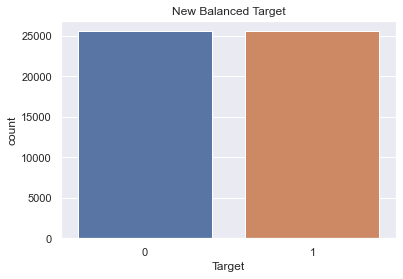

In [13]:

sns.set_theme(style ='darkgrid')
ax = sns.countplot(x ='Target', data = os_data_y)
ax.set_title("New Balanced Target")

Notice how each data set contains exactly the same number of zeros and ones. From this, we can conclude the data sets for our analysis contain meaningful variables that are now balanced (Assumption 3). Remember that an unbalanced data set will return poor results, and we needed to use the SMOTE technique to balance the data set.

# Assumption 4: Eliminate multicollinearity

In [14]:
# Import the VIF package.
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a VIF dataframe.
vif_data = pd.DataFrame()
vif_data['feature'] = df.columns
  
# Calculate VIF for each feature.
vif_data['VIF'] = [variance_inflation_factor(df.values, i)
                          for i in range(len(df.columns))]

# View the output.
vif_data

,feature,VIF
0,Age,18.783790
1,Occupation,5.169369
2,Status,9.154831
3,Edu,5.084178
4,House,2.206817
5,Loan,1.207593
6,Comm,3.863707
7,Month,7.971358
8,DOW,2.975899
9,Duration,2.451436


The values of House, Loan, Comm, DOW, Duration, Campaign, and Last_out are less than 5, while Occupatuion, Status, Edu, and Month are >5 but <10. Therefore, there is no correlation between these 11 ’s.

In [15]:
# Drop the columns with VIF > 10 to avoid multicollinearity problems.
df = df.drop(['Age', 'PosDays', 'Var_rate', 'Price_idx',
              'Conf_idx', 'Month_rate', 'Quarterly_emp'],
             axis = 1)

# View the DataFrame.
print(df.shape)
df.head()

(41188, 12)


,Occupation,Status,Edu,House,Loan,Comm,Month,DOW,Duration,Campaign,Last_out,Target
0,3,3,1,2,0,0,5,3,210,1,0,0
1,4,3,0,0,0,0,8,4,138,1,0,0
2,10,1,3,2,0,0,3,3,339,3,2,1
3,11,3,2,0,0,0,1,4,185,2,0,0
4,7,3,1,2,0,0,5,4,137,1,2,1


There are 41,188 rows and 12 columns. The seven columns were dropped successfully.

# Assumption 5: X ’s are linearly related to the log odds

The Box-Tidwell test can be used to explore whether the ’s are linearly related to the log odds (Assumption 5). However, the Box-Tidwell test is only applicable to continuous variables. Since we only have one continuous column left (Duration column), we can do a visual check of the linearity with log odds using the Duration column. When having multiple continuous columns or when we can’t visually see the linear relationship, it is better to use Box-Tidwell test. Select the tabs to continue with the demonstration. 

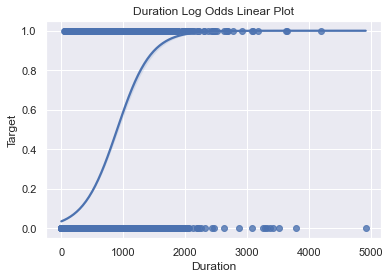

In [17]:
dur = sns.regplot(x = 'Duration',
                  y= 'Target',
                  data= df,
                  logistic= True).set_title("Duration Log Odds Linear Plot")

Now that we’ve tested all the assumptions (2.1.2 Logistic regression), the next step is to select the ’s that we think have an effect on the dependent variable. These ’s are represented in the columns. Therefore, we’ll select only the necessary columns for the BLR. Once we select the variables, we just run the logit function and summarise the model efficacy by checking the -values and . 

13. Fit the model

In [18]:
# Name the new DataFrame and specify all the columns for BLR:
nec_cols = df.drop('Target', axis = 1).columns

# Set the independent variable.
X = os_data_X[nec_cols]  

# Set the dependent variable.
y = os_data_y['Target']  

# Set the logit() to accept y and x as parameters and return the logit object.
logit_model=sm.Logit(y, X)

# Indicate result = logit_model.fit() function.
result = logit_model.fit()  

# Print the results.
result.summary()

Optimization terminated successfully.
         Current function value: 0.419450
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 Target   No. Observations:                51134
Model:                          Logit   Df Residuals:                    51123
Method:                           MLE   Df Model:                           10
Date:                Tue, 08 Nov 2022   Pseudo R-squ.:                  0.3949
Time:                        16:16:04   Log-Likelihood:                -21448.
converged:                       True   LL-Null:                       -35443.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Occupation     0.0019      0.004      0.435      0.663      -0.007       0.011
Status        -0.3281      0.012    -27.017      0.000      -0.352      -0.304
Edu           -0.0306      0.011     -2.871      0.004      -0.052      -0.010
House         -0.1744      0.013    -13.857      0.000      -0.199      -0.150
Loan          -0.3542      0.021    -17.106      0.000      -0.395      -0.314
Comm          -1.9852      0.037    -54.114      0.000      -2.057      -1.913
Month         -0.0189      0.005     -3.622      0.000      -0.029      -0.009
DOW           -0.1476      0.009    -16.425      0.000      -0.165      -0.130
Duration       0.0057   5.85e-05     96.803      0.000       0.006       0.006
Campaign      -0.2477      0.009    -29.064      0.000      -0.264      -0.231
Last_out       0.9187      0.020     45.190      0.000       0.879       0.959
==============================================================================
"""

14. Determine the accuracy of the model

In [19]:
# Import necessary packages.
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

# Split X and y data sets into ‘train’ and ‘test’ in a 30:70 ratio.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=0)

# Set LogisticRegression() to logreg.
logreg = LogisticRegression() 

# Fit the X_train and y_train data sets to logreg. 
logreg.fit(X_train, y_train) 

/Users/irinap/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
# Determine BLR model’s accuracy:
y_pred = logreg.predict(X_test)

print('Accuracy of logistic regression classifier on test set: {:.2f}'\
      .format(logreg.score(X_test, y_test)))


Accuracy of logistic regression classifier on test set: 0.82


The accuracy is 82% which is a great fit for this data set and business question. However, if you had an 82% accuracy fit for a business question based on a ‘yes’ or ‘no’ answer, it might not be a good fit. To further test the model’s accuracy, we can also employ a confusion matrix to evaluate the accuracy of the classification.

<AxesSubplot:>

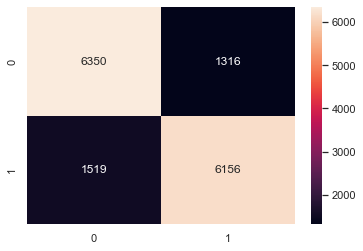

In [21]:
# Create the confusion matrix to test classification accuracy in BLR.
# Import the necessary package to create the confusion matrix. 
from sklearn.metrics import confusion_matrix  

# Indicate the confusion matrix needs to be created.
confusion_matrix = confusion_matrix(y_test, y_pred)  

# Plot the confusion_matrix.
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [22]:
# Create a DataFrame to display the confusion matrix. 
pd.DataFrame(confusion_matrix, index=['observed_notchurn','observed_churn'],
columns=['predicted_notchurn', 'predicted_churn'])

,predicted_notchurn,predicted_churn
observed_notchurn,6350,1316
observed_churn,1519,6156


    -TN indicates that 6,350 customers did not churn.
    -FP indicates that 1,316 customers did not churn but were incorrectly labelled as churners.
    -FN indicates that 1,519 customers were classified as non-churners, but they are churners.
    -TP indicates that 6,156 customers did churn.


16. Print the accuracy

In [23]:
# Import the necessary package.
from sklearn.metrics import classification_report  

# Print a report on the model's accuracy.
print(classification_report(y_test, y_pred))  

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      7666
           1       0.82      0.80      0.81      7675

    accuracy                           0.82     15341
   macro avg       0.82      0.82      0.82     15341
weighted avg       0.82      0.82      0.82     15341



The high precision scores indicate that the model is accurate. This is an important metric in this case, as we’ll need to use the model to select the most appropriate customers for the new project. In other situations, accuracy might be the most important criterion, because it is a broader measure of how many classifications are correct. In some cases, recall might be important, because we might want to know how many instances of selecting a customer were, in fact, correct.

# Conclusion

Since the objective is to identify whether a customer is likely to churn, we would want to classify customers as ‘Likely to churn’ (Target=1) or ‘Unlikely to churn’ (Target=0). We fitted a BLR model trying to predict one of two categories: 1 or 0. After working through the demonstration, we produced a model that had an accuracy score of 82%, which measures the number of correct predictions.

This is a fairly high accuracy score; and given that we can successfully classify customers that are likely to churn at an expected probability of 82%, we can hopefully intervene and prevent this from taking place. Given that we could get this wrong 18% of the time, the cost of this misclassification is likely slim compared to the benefits of identifying the cases that require intervention.

If the business case and risk of misclassification are extremely high (like in healthcare matters where the cost of misclassifying a disease is extremely high), an accuracy rate of 82% might not be acceptable, and you would want to attempt to tune the model to improve this score.